Class: AI INSIGHT 

Name: Nguyen Tho Anh Khoa

Facebook: Khoa Nguyen KT

# CNN Training – Exercise 1

## 1) Đọc hiểu các đoạn code trong file ‘Cifar_10_CNN_Training_Overfitting.ipynb’ kết hợp với xem lại nội dung bài giảng để thấy được những khó khăn và cách giải quyết khi train cho một model.

Nội dung code trong file 'Cifar_10_CNN_Training_Overfitting.ipynb' thể hiện các vấn đề xoay quanh việc overfitting và các cách cầu hình để giải quyết vấn đề này. Tập data được sử dụng là Cifar10

**conv: Convolution layer (khởi đầu bằng 64 kernels và tăng dần bằng cách gấp đôi số kernels của layers trước), và sử dụng kernel_size = 3**

**mp: Max pooling layer, reduce size bằng 2**

1/ Sử dụng shallow network (2 blocks mỗi block (1conv+1mp)) + sigmoid activate function 

2/ 3 block layers + sigmoid

3/ 3 block layers mỗi block (2conv+1mp) + sigmoid

4/ 3 block layers mỗi block (2conv+1mp) + relu

5/ 4 block layers mỗi block (2conv+1mp) + relu

6/ 4 block layers mỗi block (3conv+1mp) + relu

7/ 4 block layers mỗi block (3conv+1mp) + relu + he_init

8/ 4 block layers mỗi block (3conv+1mp) + relu + he_init + batch_norm mỗi conv

9/ 4 block layers mỗi block (3conv+1mp) + relu + he_init + batch_norm mỗi conv + skip connection mỗi block



|Network| #params | #epochs |train_loss | train_acc | val_loss | val_acc |
| ---| ---| ---| --- | ---| ---| ---|
|(1) 2x(1conv+1mp)+sigmoid| 157K | 50 |0.88 | 0.69 | 1.02 | 0.65 |
|(2) 3x(1conv+1mp)+sigmoid | 411K | 50 | 0.24 | 0.94 | 1.03 | 0.69|
|(3) 3x(2conv+1mp)+sigmoid | 3.2M | 20 | 2.3 | 0.1 | 2.3 | 0.1 |
|(4) 3x(2conv+1mp)+relu | 3.2M | 50 | 0.03 | 0.99 | 1.77 | 0.78 |
|(5) 4x(2conv+1mp)+relu | 5.7M | 50 | 0.04 | 0.99 | 1.49 | 0.79 |
|(6) 4x(3conv+1mp)+relu | 8.8M | **10** | 2.3 | 0.1 | 2.3 | 0.1 |
|(7) 4x(3conv+1mp)+relu+he_init | 8.8M | 50 | 0.06 | 0.98 | 1.48 | 0.79 |
|(8) 4x(3conv+1mp)+relu+he_init+batch_norm/conv | 8.8M | 50 | **0.01** | **1.0** | **0.89** | **0.85** |
|(9) 4x(3conv+1mp)+relu+he_init+batch_norm/conv+skip_connection/block | **10.4M** | 50 | 0.03 | 0.99 | 1.93 | 0.77 |

Nhìn chung, từ bảng ở trên có thể thấy được model **(1)** là trường hợp duy nhất bị underfit (không đủ capacity để giải quyết được độ phức tạp của data), còn các trường hợp còn lại đều là overfit (model dư khả năng học được tốt với tập train và trở nên mất đi tính tổng quát), ngoại trừ model **(3)** và **(6)** là model đã không thể học được bất cứ thông tin gì về tập data này. Hơn thế nữa có thể quan sát thấy số lượng paramater tăng dần theo từng model thể hiện hiện việc capacity được tăng liên tục nhưng có rất nhiều biến động trong acc/loss trong tập train và val.

- Model **(1)** acc của train và val chỉ tầm dưới 0.7, chỉ thể hiện hiện model không đủ khả năng học tốt trên data này.

- Model **(2)** train_acc là 0.94 trong khi val_acc là 0.69, cho thấy model đã đươc cải thiện bằng việc tăng thêm một block layer dẫn đến việc dư sức học data train đến mức học cực kỳ chi tiết và làm mất đi tính tổng quát, không thể predict tốt cho tập val.

- Model **(3)** và **(6)** đã không học được gì từ data, có thể nguyên nhân là vanishing gradient khi thực hiện backward làm cho weight không được update, ở model **(3)** vì dùng hàm sigmoid nên giá trị input càng lớn (xa dần theo 2 cực âm/dường) thì output sẽ rơi vào vùng saturation nơi mà đạo hàm gần như bằng không, do đó để khắc phục lỗi này **relu** được dùng thay cho sigmoid. Ở model **(6)** model quá deep và khởi tạo weigh không tốt sẽ dẫn đến vanishing gradient khi phải qua nhiều layer.

- Model **(4)** và **(5)** thay thế  sigmoid bằng **relu** đã giải quyết được vấn đề vanishing nhưng lại quay về overfitting mặc dù val_acc đã cao hơn so với **(2)**

- Model **(7)** giải quyết vanishing của **(6)** bằng cách khởi tọ theo HE initialization.

- Model **(8)** cho ra kết quả tốt nhất từ acc của train đến val, bằng cách thêm **Batch Normalization** theo sau các conv layers. Bởi vì khi mỗi lần qua 1 layer distribution từ kết quả của layer trước sẽ bị thay đổi dẫn đến việc học chậm hơn vì các layer phía sau phải học và update theo distribution mới liên tục. Do đó Batch Normlization đã giải quyết được khá tốt vấn đề này bừng cách làm cho fix distribution sau khi qua các conv layer.

- Model **(9)** thêm skip conenction, qua các thực nghiệm skip connection cải thiện rất tốt cho các kiến trúc netowrk nhưng tại đây kết quả cho ra tệ hơn có thể bắt nguồn từ việc các phương pháp của model trước đã giải quyết tốt các vấn đề để train model tổng quát hơn. Vì vậy ở đâu khi sử dụng thêm skip conenction đã làm model bị overfitting đông nghĩa với việc khi ta làm phức tạp thêm data có thể model này sẽ cho ra kết quả tốt hơn các cái còn lại.



## 2) (Optional) Các bạn đọc thêm để hiểu rõ hơn về
## - Batch normalization
## - Skip connection
## - He Initialization

### **Batch normalization**

- Khi train một model càng sâu thì việc initial weight và lựa chọn learning rate sẽ cần phải kỹ lưỡng vì làm chậm việc học hoặc thậm chí không học được gì. Một trong những nguyên nhân là distribution của input các layers thay đổi (internal covariance shift), vì sau mỗi mini batch các parameter trong network được update mà đối với một deep network chỉ cần sự thay đổi nhỏ trong parameter của layer trước sẽ dẫn đến sự thay đổi nhỏ trong layer của hiện tại và sự thay đổi lớn dần khi càng đi sâu qua từng layer. Do đó, các layers sẽ phải liên tục học các distribuition mới để thích nghi khi distribution của input thay đổi dẫn đến việc học rất chậm.

- Batch normalization (BN) ra đời để giải quyết vấn đề này, đây là 1 kỹ thuật input của các layer cho mỗi mini-batch đem lại các lợi ích sau:
     - Cho phép sử dụng learning lớn cái mà có thể dẫn đến việc không hội tụ nếu không dùng BN, bằng cách làm giảm sự phụ thuộc củ gradient vào sacle của parameter và initial value.
     - Có tính năng như regularization và giảm sự càn thiết sử dụng dropout.
     - Làm giảm được generalization error.
     - Có thể cho phép train được với các saturating activation như sigmoid,...
     - Làm tăng tốc độ hội tụ do cố định mean và var của layer input làm cho distribution hạn chế việc thay đổi.

Problem:
- Trong training có 1 vấn đề là model sẽ được update backward từ output dến input bằng cách đi qua mỗi layer dựa trên hàm lỗi với giả sử rằng weights của các layer trước đó là không đổi nhưng trong thực tế các weight được update cùng lúc. Bởi vì tất cả weight thay đổi nên việc học cứ phải chạy theo 1 mục tiêu di chuyển liên tục. ví dụ 1 layer cập nhật weight theo 1 distribution của layer trước, nhưng distribution đã là cái mà đã bị thay đổi khi layer trước đó cập nhật. Việc này dẫn đến làm chậm training vì nó yêu cầu laerning rate thấp, cẩn trọng trong việc khởi tạo weight và đối với saturating nonlinearities thì càng khó hơn.

Standardize Layer Inputs:
- Kỹ thuật này rescaling output của một layer trước khi nó đi vào layer tiêp theo, để có được zero mean và unit standard deviation. Và trong xử lý ảnh (lĩnh vực computer vision) quy trình này được gọi là **whitening**. Kỹ thuật này giúp cố định distribution của input và xóa bỏ các ảnh hưởng của internal covariance shif, ổn định quá trình training và làm tăng tốc độ hội tụ. Ngoài ra BN cũng có công dụng trong việc làm phẳng bề mặt của loss giúp cho gradient có thể trượt với learning rate lớn hơn để model hội tụ nhanh hơn.

Implementation:
- BN được hiểu đơn giản là sẽ normalize các batches trong network (giữa các layers).
- Mỗi input variable của 1 layer sẽ được tính mean và standard deviation trên mỗi mini-batch. Ngoài ra còn có 1 cách sử average mean và standard deviation cho các mini-batch nhưng nó có thể dẫn đến training không ổn định

- formulas: $$Z^N=(\frac{z-\mu_z}{\sigma_z})$$, trong đó z là output trước khi qua activation, N số lượng samples trong 1 mini-batch, $\mu_z$ và $\sigma_x$ là mean và standard deviation của mini-batch 





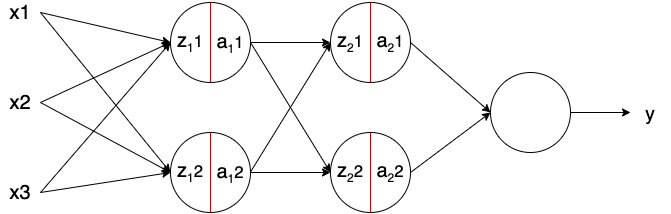

- Công thức cho 1 mạng NN bình thường: $$z = g(w,x) +b \quad and \quad  a = f(z)$$
- Công thức cho 1 mạng NN sử dụng batch normalization:
$$z=g(w,x) \quad then \quad Z^N=(\frac{z-\mu_z}{\sigma_z})\gamma +\beta \quad then \quad a=f(z^N)$$

- Hình trên là 1 mạng neuron network với input x đi qua linear transformation g() với weight w, tiếp theo nó sẽ đi qua batch norm trước khi đi vào activtion function với 2 thông số được sử dụng ở forward state là $\mu_z$ và $\sigma_z$. Ngoài ra có thêm 2 paramter tham gia vào quá trình học ở giai đoạn backward là $\gamma$ và $\beta$ dùng để shift mean và standard deviation của mini-batch. Hơn thế , bias không được sử dụng trong BN vì khi trừ đi mean, các hằng số trong z sẽ bị trừ đi chính nó. 



Advantages
- Distribution khi qua các layer được cố định dẫn đến việc học nhanh hơn, normalize để các giá trị cùng scale không chỉ ở layer input mà các layer khác cũng cùng scale.
- Vì sử dụng mini-batch thay vì toàn bộ data nên sẽ có nhiễu trong các batch này và nó được vào trong quá trình học nên xem như có regularize (chỉ 1 phần nhỏ)
- Giảm sự phụ thuộc của griadient vào các tỉ lệ các parameters, hoặc giá trị khởi tạo weight, có thể sử dụng learning rate cao hơn và tránh được việc không hộ tụ.
- Có thể sử dụng saturating activation.

Disadvantages
- Mini-batch = 1 thì có standard deviation =0 dẫn đên batch norm không hoạt động.
- Nếu Mini-batch quá nhỏ đôi khi có thể dẫn đến thêm nhiễu vào model và làm giảm performance.


###**Skip Connection**

Problem 
- Mục đích Backpropagation là làm giảm thiểu loss (là 1 thước đo định lượng (quantitative measure) giữa 2 tensor ground truth và predict) bằng cách update parmeters trong network. Backpropagation hiểu được hướng nên thay đổi weigts trong network để  thay đổi làm giảm thiểu loss bằng các tính đạo hàm riêng. Thông thường những giá trị trong khi backpropagation đi qua 1 layer sẽ nhỏ hơn 1 bất kể về dấu (+-), và backpropagation sử dụng theo chain rule nên tất cả các output sau khi backpropagation của từng layer được nhân lại với nhau. Trong trường hợp tổng quát, điều này có thể giúp mạng học ổn định vì các lần update sẽ không quá nhanh cái mà có thể tạo ra hỗn loạn và không thể hội tụ, tuy nhiên nó cũng đồng nghĩa với việc khi đi qua các mạng quá sâu giá trị sẽ nhỏ dần và dẫn đến vấn đề  Vanishing gradient. Từ đó skip connection được tạo ra để gải quyêt vẫn đề này.

- Skip connection thường được đề cập như là 1 block các layers, trong các block này ngoài việc các layer kết nối theo chuỗi liên tiếp nhau thì sẽ có 1 hoặc 1 vài layer sẽ kết nối với layer khác bằng cách bỏ qua các layer ở giữa. Bằng cách này nó cho phép gradient có thể được diễn ra tốt hơn trong backpropagation và hội tụ tốt hơn. Thông thường có 2 cách để thực hiện skip connection

    - **Additon:** output của một layer sẽ được dùng như input của 1 layer khác (không phải layer theo chuỗi liên tiếp) và được cộng vào với output hiện tại của layer đó. Vì khi backpropagation hiện tượng vanishing gradient sẽ tác động làm cho các layers trước (top layers) học được nhanh hơn các layers sau (bottom layers), việc add thêm connection khi skip 1 vài layers giúp tăng cường cho gradient để có thể lan truyền đến các bottom layers. Thông thường output của các block sau khi qua  sẽ có dạng $y=f(x)$ còn khi dùng skip connection (adding) $y=f(x) + x$ trong đó x sẽ được backpropagtion tốt hơn.

     ![res_skip](https://paperswithcode.com/media/methods/resnet-e1548261477164_2_mD02h5A.png)
    - **Concatenation:**output của một layer sẽ được dùng như input của 1 layer khác (có thể không phải layer theo chuỗi liên tiếp) và được nối vào với output hiện tại của layer đó (làm tăng lên số lượng filter hay channel).
    ![con_skip](https://paperswithcode.com/media/methods/Screen_Shot_2020-06-20_at_11.33.17_PM_Mt0HOZL.png)


Implementation
- **Addition:** Một kiến trúc network (architecture network) cùng với learning rate và hyperparameters sẽ cho ra được một tập các lớp function $F$, với mỗi một set parameter (wiegth và bias) sẽ cho ra một $f \in F$ thông qua việc training trên 1 tập dataset. Điều mong muốn nhất là $f^*$ (function ta muốn tìm cho tập dataset của mình) sẽ nằm trong $F$ nhưng trong thực tế hầu như là không thể, do đó cái ta cần tìm là $f_F^*$ tốt nhất cho tập dataset của mình được train. Nếu 1 architecture netowrk mạnh hơn được thiết kế $F^{'}$ (ví dụ tưng capacity của model) thường được mong đợi sẽ cho kết quả tốt hơn $F$, tuy nhiên trong thực tế điều đó không đúng khi $F \not\subset F^{'}$. ví dụ hình bên dưới, ảnh trái non-nested function classes $F_3$ gần nhất với $f^*$ so với $F_1$ cho đến $F_6$. Việc tăng capacity của model sẽ giúp đạt được kết quả chỉ đúng khi $F_1 \subset F_2 \subset ... \subset F_6$ như ảnh bên phải nested-function classes. Do đó câu hỏi được đặt ra liệu identity function $f(\pmb{x})= \pmb{x}$ khi được thêm vào trong qua training sẽ cho ra kết quả ít nhất là bằng với model ban đầu? Và nếu có thể nó se giúp model đơn giảng hơn, train nhanh hơn, giảm đươc error tốt hơn. Như vậy ý tưởng của skip connection bằng residual block là dùng một model rất sâu chia thành nhiều block mỗi block này được add thêm identity function để đảm bảo nếu larger function không chứa smaller function thì vẫn có thể học tốt được nhờ vào indetity function. <br/>![nested_f](https://d2l.ai/_images/functionclasses.svg)
    - Với ý tưởng là add identity function $f(\pmb{x})=\pmb{x}$ vì có thể optimization fucntion lại là $\pmb{x}$, do đó, model thường thì (ảnh dưới trái) sẽ cố học cách map để cho ra $f(\pmb{x})$ và sau đó sẽ đi qua acitvation function, nhưng với residual block thì sẽ cố học residual mapping $f(\pmb{x})-\pmb{x}$ và cộng thêm identity mapping $g(\pmb{x})=\pmb{x}$. Cách hoạt động này dựa trên giả thuyết rằng residual mapping sẽ dễ  optimize hơn so với original mapping $f(\pmb{x})-\pmb{x} + g(\pmb{x})$. Hơn nữa, if identity mapping là optimal thì nó sẽ dễ dàng hơn bằng cách set residual bằng 0. <br/> ![res](https://d2l.ai/_images/residual-block.svg)
    - Bởi vì là element-wise addition, nên bắt bưộc output của residual mapping và identity mapping phải có cùng width, height, depth. Nhưng trong 1 số trường hợp, cả 2 có thể khác dimension (thường là khác về  depth), do đó trong identity mapping sẽ đi qua 1 conv có size 1x1 để thay đổi channel bằng với output của residual mapping như ảnh dưới bên phải.<br/>
![2res](https://d2l.ai/_images/resnet-block.svg)

- **Concatenation:** Tương tự ý tưởng như **Addition** trong skip connection, nhưng thay vì thực hiện add trước khi vào activation thì phương pháp này concatenate (tức là gộp các feature map tạo ra một feature map mới có số lượng lơn hơn về depth). Ý tưởng này cũng dựa trên khai triên Taylor bằng cách phân giải 1 phương trình thành đa thức với bậc tăng dần, tượng tự nhưa kỹ thuật này function đươc phân giải thành $f(\pmb{x}) = \pmb{x} + g(\pmb{x})$ 1 tuyến tính và 1 phi tuyến tinh phức tạp và sau đó nó sẽ được concatenate tăng dần lên. Có thành phần chính trong mạng **dense block** (concatenate input output) và **transition layer** điều khiển depth để nó không quá nhiều bằng cách sử dụng conv 1x1 để điều khiển số lượng depth, trong khi dùng average pooling để điều khiển height and width.  <br/>
![den_add](https://d2l.ai/_images/densenet-block.svg)





Advantages
- Skip connection giúp cho việc backgropagation diễn ra dễ hơn và tốt hơn.
- Đảm bảo được dù làm cho model deep hơn (tăng số lượng layer) thì vẫn tránh được vấn đề vanishing gradient, và function được xây dựng từ parmeters của model có kiến trúc phức tạp sẽ gần hơn với function mong muốn của 1 tập dataset cụ thể.
- Nó có giúp cho việc giữ được low level feature sau khi được extract ra từ các layers đầu không bị trừu tượng hóa sau khi qua các layer phía sau

Disadvantages:
- Phải điều khiển số lượng depth hợp lý nếu không sẽ đẫn đến việc học rất chậm.
- Phải đảm bảo trước khi operate trên skip connection các feature map phải cùng width, hieght, and depth

###**He Initialization**

Problem:
- Vấn đề liên quan đến việc khi model quá sâu sẽ bị 1 trong 2 trường hợp Exploding hoặc Vanishing, một trong những nguyên nhân là do weight được khởi tạo không tốt. Khi khởi tạo weight, nó được khuyến khích là phải random (vì nếu các unit có weight giống nhau, thì sẽ cùng học theo một hướng dẫn đến việc tăng lượng unit trong 1 layer cũng vô ích), do đó random theo normal distribution thường được hay sử dụng. Tuy nhiên, khi qua các layer sẽ có thay đổi ít nhiều về  variances (hoặc standard deviation ) , và sư thay đổi này được chồng chất lên khi số lượng layer càng nhiều lên. Ví dụ trong mạng MLP, $\hat{\pmb{y}} = \pmb{W*X} + \pmb{b} $ trong đó \pbm{X và W} được khởi tạo theo Standard Normal Distribution với mean và standard deviation$\mu = 0, \sigma=1$. Bỏ qua nonlinear activation function (được xem như là tuyến tính), thì khi thực hiện tính cho ra kết quả $\hat{y}$ thì **$\sigma_y =$ # sqrt(operations của x\*w\)* standard deviation được khởi tạo trong x và w**. Ví dụ 10000 layers có 512 units, thì shape của input=512, W=512x512 để cho ra output có shape 512 thì phải thực hiện phép nhân ma trận với số lần sum của từnng element là 512. Do đó sau khi qua 10000 layers thì $ \sigma_{10000} = \sqrt(512) $. Để đảm bảo được standard deviation = 1 sau khi qua 10000 layers thì weight khởi tạo theo standard normal distribution chia cho $\sqrt(512)$.

- Cách giải quyết trên thực sự vẫn chưa tốt khi được áp dụng trong khởi tạo weight theo Uniform distribution, và vấn đề về điều khiển standard deviation khi thực hiện backpropagation. Do đó có 1 phương pháp tên là Xavier Initialization được tạo ra để khắc phục vấn đề này. Fully connected layers (không dùng non-linear activation fucntion)sẽ được tính theo công thức:
  - $o_i = \sum^{n_{in}}_{j=1}{w_{ij}*x_j}$, trong đó $o_i$ là unit thứ i của output layer, $n_{in}$ là số lượng unit trong input của layer, $w_{ij}$ là weight cho input element j của ouput unit i, và $x_j$ là input unit của layer.
  - Giả sử khởi tạo weight theo distribution (không nhất thiết là Normal distribution) có zero mean và variance $\sigma^2$, và input có distribution với zero mean và variance $\gamma^2$. Giả sử $x_j, w_{ij}$ là independent. Để tính được mean và variance của $o_i$ ta thực hiện các phép tính sau: <br/>
$E[o_i] = \sum^{n_{in}}_{j=1}{E[w_{ij}*x_j]} 
\\ = \sum^{n_{in}}_{j=1}{E[w_{ij}]*E[x_j]} 
\\ = 0 $ $~~~~~~~~~~~~~~~~$
$Var[o_i] = E[(o_i - E[o_i])^2]
\\ = E[o_i^2 - 2*o_i*E(o_i) + E[o_i]^2]
\\ = E[o_i^2] - 2*E[o_i]^2 + E[o_i]^2 
\\ = E[o_i^2] -  E[o_i]^2 
\\ = \sum^{n_{in}}_{j=1}E[w_{ij}^2*x_{j}^2] -  E[o_i]^2 
\\ = \sum^{n_{in}}_{j=1}E[w_{ij}^2]*E[x_{j}^2] - 0 
\\ = \sum^{n_{in}}_{j=1}E[(w_{ij} - E[w_{ij}] )^2 ]*E[(x_{j} - E[x_{j}])^2] 
\\ =\sum^{n_{in}}_{j=1}Var[w_{ij}]*Var[x_{j}]
\\ = \sum^{n_{in}}_{j=1}\sigma^2 * \gamma^2 
\\= n_{in}*\sigma^2 * \gamma^2 $

  - Tương tự ở backpropagation thì variance sẽ thu được là $n_{out}*\sigma^2 * \gamma^2 $

  - Để duy trì variance gần như là constant để tránh trường hợp Explode và Vanishing, thì khởi tạo weight phải làm sao input variance là không đổi bằng cách $n_{in}*\sigma^2 =1$ (forward) và $n_{out}*\sigma^2 =1$ (backward). Nhưng không thể  đáp ứng yêu cầu cùng lúc cho cả 2. Do đó sẽ làm cho tích trung bình cộng của cả 2 và variance của weight = 1. <br/> 
  $\frac{n_{in}+n_{out}}{2}*\sigma^2 = 1$ hoặc $\sigma=\sqrt{\frac{2}{n_{in}+n_{out}}}$
  - Trong trường hợp muốn sử dụng Uniform distirbution U(-a, a) (cái mà có variance $\frac{a^2}{3}$). Do đó U($-\sqrt{\frac{6}{n_{in}+n_{out}}}$, $\sqrt{\frac{6}{n_{in}+n_{out}}}$)
  - **=>Xavier intialization khi sử dụng <br/> Gaussian distribution: $\sigma=\sqrt{\frac{2}{n_{in}+n_{out}}}$ <br/>Uniform distribution: U($-\sqrt{\frac{6}{n_{in}+n_{out}}}$, $\sqrt{\frac{6}{n_{in}+n_{out}}}$) <br/> Mặc dù công thức trên được chứng minh khi không sử dụng non-linear activation function nhưng Xavier initialization vẫn hoạt động tốt với các symetric activation như sigmoid, tanh,...**

- Tuy vậy, xavier initial vẫn không hoạt động tốt với Relu activation. Do đó, He initialization được tạo ra để giải quyêt vấn đề này.



Implementation: 

- He Intialization hoạt động dựa trên 3 giả định:
  - Các element trong Input, Weight, và Output trong mỗi layer phải có distribution gần giống nhau và là các independent variables (ví dụ input layer 1 có distribution giống layer 2). 
  - Mỗi element trong Weight, và mỗi element trong Input là độc lập không phụ thuộc lẫn nhau.
  - Weight và Output có zero mean và **đối xứng qua 0** (gần giống normal distribution).
  - Không cần thiêt phải khởi tạo bias cho từng layer, nên bias ban đầu sẽ = 0.

- Một trong những vấn đề  Relu không thể sử dụng khi áp dụng với Xavier Initialization là do Relu không có zero mean, nên khi ouput của layer trước là input của layer sau khi qua Relu sẽ không còn là zero mean. 

- Triển khai thì chỉ có Weight là zero mean, còn Input thì không, vì sẽ bao gồm activation function nền sẽ không còn $x_j$ mà là $a_j$: <br/>
$E[o_i] = \sum^{n_{in}}_{j=1}{E[w_{ij}*a_j]} 
\\ = \sum^{n_{in}}_{j=1}{E[w_{ij}]*E[a_j]} 
\\ = 0 $ $~~~~~~~~~~~~~~~~$
$Var[o_i] = E[(o_i - E[o_i])^2] 
\\ = E[o_i^2 - 2*o_i*E(o_i) + E[o_i]^2] 
\\ = E[o_i^2] - 2*E[o_i]^2 + E[o_i]^2 
\\ = E[o_i^2] -  E[o_i]^2 
\\ = \sum^{n_{in}}_{j=1}E[w_{ij}^2*a_{j}^2] -  E[o_i]^2 
\\ = \sum^{n_{in}}_{j=1}E[w_{ij}^2]*E[a_{j}^2] - 0 
\\ = \sum^{n_{in}}_{j=1}E[(w_{ij} - E[w_{ij}] )^2 ]*E[a_{j}^2] 
\\ = n_{in}*\sigma^2 * E[a_{j}^2] $

- Cần tìm mean của bình phương input trong continuos distribution <br/>
$E(x) = \int_{-\infty}^{\infty} {x*f(x)dx}, \ \text{(trong đó $f(x)$ là probability density function)}
\\<=> E(a_j^2) = \int_{-\infty}^{\infty} a_j^2*f(a_j)da_j
\\ \qquad \qquad \ = \int_{-\infty}^{\infty} max(0,y_j)^2*f(y_j)dy_j
\\ \qquad \qquad \ = \int_{0}^{\infty} y_j^2*f(y_j)dy_j \quad \text{(y đối xứng qua 0 và f(y) giả định đối xứng qua 0)}
\\ \qquad \qquad \ = \frac{1}{2}\int_{-\infty}^{\infty} y_j^2*f(y_j)dy_j
\\ \qquad \qquad \ = \frac{1}{2}\int_{-\infty}^{\infty} (y_j - E[y_j])^2*f(y_j)dy_j \quad \text{$E[y_j]$ = 0 vì phần linearity vẫn có gắng giữ distribution có zero mean (kế thừa từ Xavier)}
\\ \qquad \qquad \ = \frac{1}{2} E[(y_j - E[y_j])]^2
\\ \qquad \qquad \ = \frac{1}{2} Var(y_j)
$.

- $Var[o_i] = n_{in}*\sigma^2*\frac{1}{2}Var[y_j] \quad \text{($o_i$ chính là $a_{j+1}$)}$ <br/> 
$<=> Var[a_j] = n_{in}*\sigma^2*\frac{1}{2}Var[y_{j-1}]$

- Đặt L là số lượng layer từ input đến output:<br/>
$Var[\pmb{a}^L] = Var[\pmb{a^1}] \prod_{l=2}^{l} \frac{1}{2}n^{l} *Var[\pmb{W}^l]  
\\ \qquad  \quad \ = \prod_{l=1}^{l} \frac{1}{2}n_{l} *Var[\pmb{W}_l] 
$

- Vì để tránh exploding hay vanishing thì cần phải giữ cho variance của input và output hạn chế thay đổi ít nhất.<br/>
Cần $Var[a^L]=Var[a^1]$ <br/>
=> $\frac{1}{2}n^{l} *Var[\pmb{W}^l] = 1, \quad \forall l $ <br/>
=> $Var[\pmb{W}^l] = \frac{2}{n^l}, \quad \forall l $

- **Nếu khởi tạo theo He với Normal Distribution thì $W\text{~}N(0, \frac{2}{n^l})$**





Advantages:

Disadvantages:

## 3) (Optional) Dựa vào file ‘Cifar_10_CNN_Training_Overfitting.ipynb’, các bạn thực nghiệm tương tự cho dataset Cifar100.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')
print("samples of train: ", x_train.shape)
print("samples of test: ", x_test.shape)
print("classes: ", len(np.unique(y_train)))


169009152/169001437 [==============================] - 2s 0us/step
samples of train:  (50000, 32, 32, 3)
samples of test:  (10000, 32, 32, 3)
classes:  100


### Preprocessing Data

In [ ]:
class NormalizeLayer(keras.layers.Layer):
  def __init__(self):
    super(NormalizeLayer, self).__init__()
  def build(self, input_shape):
    self.kernel = None
  @tf.function
  def call(self, inputs):
    b, h, w, c = inputs.shape
    # inputs = tf.cast(inputs, dtype=tf.float64)
    means = tf.math.reduce_mean(inputs, axis=(1,2))
    means = tf.reshape(means, (-1, 1, c))
    print(means)
    stddv = tf.math.reduce_std(inputs, axis=(1,2))
    stddv = tf.reshape(stddv, (-1, 1, c))
    
    inputs = tf.reshape(inputs, (-1, h*w, c))
    inputs -= means
    inputs /= stddv

    inputs = tf.reshape(inputs, (-1, h,w,c))

    # c1 = inputs[:,:,:,0] -  means[:,0]*tf.ones_like(inputs[:,:,:,0])
    # c2 = inputs[:,:,:,1] -  means[:,1]*tf.ones_like(inputs[:,:,:,1])
    # c3 = inputs[:,:,:,2] -  means[:,2]*tf.ones_like(inputs[:,:,:,2])

    # c1 = c1 /  stddv[:,0]
    # c2 = c2 /  stddv[:,1]
    # c3 = c3 /  stddv[:,2]

    # inputs /= 255.0
    # inputs[:,:,:,0] -=  means[:,0]
    # inputs[:,:,:,1] -=  means[:,1]
    # inputs[:,:,:,2] -=  means[:,2]

    # inputs[:,:,:,0] /=  stddv[:,0]
    # inputs[:,:,:,1] /=  stddv[:,1]
    # inputs[:,:,:,2] /=  stddv[:,2]
    # outputs = tf.stack([(inputs[:,:,:,0]-  2),(inputs[:,:,:,1]-  2),(inputs[:,:,:,2]-  2)], axis=-1)
    # outputs = tf.stack([c1,c2,c3], axis=-1)
    # print(outputs.shape)
    print(inputs)
    return inputs



In [ ]:
# a = keras.layers.Input((28, 28,3))
# NormalizeLayer()(a)

In [ ]:
# NormalizeLayer()(x_train[0:2,:,:,:])

### Buidle Model

In [ ]:
initializer = tf.keras.initializers.HeNormal()

def identity_block(input_tensor, kernel_size, filters):
  filter1, filter2, filter3 = filters
  bn_axis=3 # channels last
  x = keras.layers.Conv2D(filters=filter1, kernel_size=(1,1), kernel_initializer='he_normal')(input_tensor)
  x = keras.layers.BatchNormalization(axis=bn_axis)(x)
  x = keras.layers.Activation('relu')(x)

  x = keras.layers.Conv2D(filters=filter2, kernel_size=kernel_size, padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.BatchNormalization(axis=bn_axis)(x)
  x = keras.layers.Activation('relu')(x)

  x = keras.layers.Conv2D(filters=filter3, kernel_size=(1,1), kernel_initializer='he_normal')(input_tensor)
  x = keras.layers.BatchNormalization(axis=bn_axis)(x)
  x = keras.layers.add([x, input_tensor])
  x = keras.layers.Activation('relu')(x)
  return x

def conv_block(input_tensor, kernel_size, filters, strides=(2,2)):
  filter1, filter2, filter3 = filters
  bn_axis=3 # channels last
  x = keras.layers.Conv2D(filters=filter1, kernel_size=(1,1), strides=strides, kernel_initializer='he_normal')(input_tensor)
  x = keras.layers.BatchNormalization(axis=bn_axis)(x)
  x = keras.layers.Activation('relu')(x)

  x = keras.layers.Conv2D(filters=filter2, kernel_size=kernel_size, padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.BatchNormalization(axis=bn_axis)(x)
  x = keras.layers.Activation('relu')(x)

  x = keras.layers.Conv2D(filters=filter3, kernel_size=(1,1), kernel_initializer='he_normal')(x)
  x = keras.layers.BatchNormalization(axis=bn_axis)(x)
  shortcut = keras.layers.Conv2D(filters=filter3, kernel_size=(1,1), strides=strides, kernel_initializer='he_normal')(input_tensor)
  shortcut = keras.layers.BatchNormalization(axis=bn_axis)(shortcut)
  x = keras.layers.add([x, shortcut])
  x = keras.layers.Activation('relu')(x)
  return x


input_layer = keras.layers.Input(shape=(32, 32, 3))
x = NormalizeLayer()(input_layer)
x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

x = conv_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])

# x = conv_block(x, 3, [512, 512, 2048])
# x = identity_block(x, 3, [512, 512, 2048])
# x = identity_block(x, 3, [512, 512, 2048])

x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Conv2D(filters=2048, kernel_size=(4,4))(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Activation('relu')(x)

x = keras.layers.Reshape((1,1,1024))(x)
x = keras.layers.Conv2D(filters=100, kernel_size=(1,1), activation='softmax')(x)
x = keras.layers.Reshape((100,))(x)
# x = keras.layers.Dense(100, activation='softmax')(x)
model = keras.Model(input_layer, x)

model.summary()



Tensor("Reshape:0", shape=(None, 1, 3), dtype=float32)
Tensor("Reshape_3:0", shape=(None, 32, 32, 3), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
normalize_layer_1 (NormalizeLay (None, 32, 32, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   256         normalize_layer_1[0][0]          
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0

### Train Model 1

In [ ]:
cifar100_train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))  

In [ ]:
cifar100_train_ds = cifar100_train_ds.shuffle(50000).batch(512)

In [ ]:
cifar100_test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(512)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(cifar100_train_ds, validation_data=cifar100_test_ds, epochs=25)

Epoch 1/25
98/98 [==============================] - 127s 1s/step - loss: 4.1336 - accuracy: 0.1072 - val_loss: 14.7119 - val_accuracy: 0.0267
Epoch 2/25
98/98 [==============================] - 114s 1s/step - loss: 2.8985 - accuracy: 0.2840 - val_loss: 5.7966 - val_accuracy: 0.1233
Epoch 3/25
98/98 [==============================] - 114s 1s/step - loss: 2.4037 - accuracy: 0.3778 - val_loss: 4.7627 - val_accuracy: 0.1733
Epoch 4/25
98/98 [==============================] - 114s 1s/step - loss: 2.0454 - accuracy: 0.4576 - val_loss: 3.3225 - val_accuracy: 0.2625
Epoch 5/25
98/98 [==============================] - 114s 1s/step - loss: 1.7533 - accuracy: 0.5231 - val_loss: 3.0558 - val_accuracy: 0.3105
Epoch 6/25
98/98 [==============================] - 114s 1s/step - loss: 1.5171 - accuracy: 0.5815 - val_loss: 3.2031 - val_accuracy: 0.3122
Epoch 7/25
98/98 [==============================] - 114s 1s/step - loss: 1.2813 - accuracy: 0.6394 - val_loss: 2.8662 - val_accuracy: 0.3602
Epoch 8/25
9

## References

2.1/
- https://arxiv.org/pdf/1502.03167.pdf
- https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
- https://viblo.asia/p/normalization-and-normalization-techniques-in-deep-learning-QpmleJyn5rd
- https://www.baeldung.com/cs/batch-normalization-cnn

2.2/
- https://arxiv.org/pdf/1512.03385.pdf
- https://theaisummer.com/skip-connections/#:~:text=Skip%20connections%20for%20the%20win,module%20in%20many%20convolutional%20architectures.&text=Skip%20connections%20in%20deep%20architectures,of%20only%20the%20next%20one).
- Multi-MemoryConvolutionalNeuralNetworkforVideoSuper-Resolution.pdf
- https://paperswithcode.com/methods/category/skip-connection-blocks 
- https://viblo.asia/p/gioi-thieu-mang-resnet-vyDZOa7R5wj
-https://forum.machinelearningcoban.com/t/01-03-2018-11-59-cho-em-hoi-tai-sao-trong-cnn-ap-dung-resnet/12497
- https://d2l.aivivn.com/chapter_convolutional-modern/resnet_vn.html
- https://towardsdatascience.com/foundations-of-ml-parameterized-functions-d2951a62272e#:~:text=A%20parameterized%20function%20is%20a,a%20is%20the%20constant%20one.

2.3/
- https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html
- https://d2l.aivivn.com/chapter_multilayer-perceptrons/numerical-stability-and-init_vn.html
- https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79
- https://paperswithcode.com/method/he-initialization
- https://medium.com/@shoray.goel/kaiming-he-initialization-a8d9ed0b5899
- https://stats.stackexchange.com/questions/138035/variance-calculation-relu-function-deep-learning
- https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404
- https://www.telesens.co/2018/04/09/initializing-weights-for-the-convolutional-and-fully-connected-layers/

3/
- https://www.tensorflow.org/guide/data#basic_mechanics
- https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
- https://www.tensorflow.org/tfx/tutorials/transform/simple
- https://www.tensorflow.org/tfx/transform/get_started
- https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
- https://aihub.cloud.google.com/u/0/p/products%2Fee2b7309-ee34-41b1-a993-3d7522ccbfb9

### Train Model Draft

In [ ]:
fmnist_train_ds = cifar100_train_ds.shuffle(5000).batch(2)
for a, b in fmnist_train_ds:
  print(a.shape)
  print(b.shape)
  break

(2, 32, 32, 3)
(2, 1)


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)
for img, label in  fmnist_train_ds:
  l = loss(model, img, label, training=False)
  print("Loss test: {}".format(l))
  break

Loss test: 1826.7061767578125


In [ ]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


In [ ]:
loss_res = []
acc_res = []
num_epochs = 10
cifar100_train_ds = cifar100_train_ds.shuffle(50000).batch(128)
for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  for x, y in cifar100_train_ds:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))
  # End epoch
  loss_res.append(epoch_loss_avg.result())
  acc_res.append(epoch_accuracy.result())
  if epoch % 1 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


KeyboardInterrupt: ignored

TypeError: ignored

? implement and prove by code